In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [7]:
df.shape

(11251, 15)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#Drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [13]:
#checcking columns are droped or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [14]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
#Drop null values
df.dropna(inplace = True)

In [19]:
#check null values droped or not
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [20]:
#Chnage data type. ex- from float to integer
df['Amount'] = df['Amount'].astype ('int')

In [21]:
#check data type changed
df['Amount'].dtypes

dtype('int32')

In [22]:
#descirbe method returns the description of data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
#Use describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

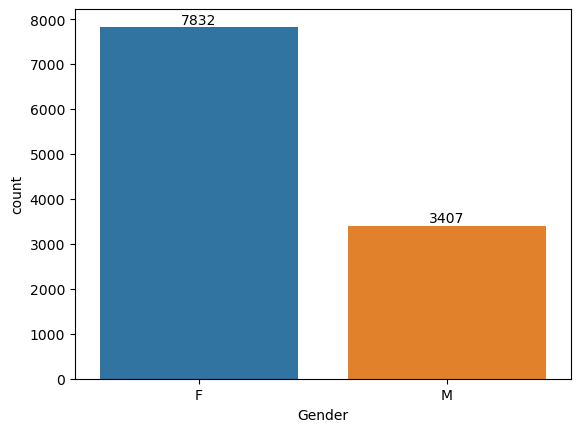

In [28]:
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

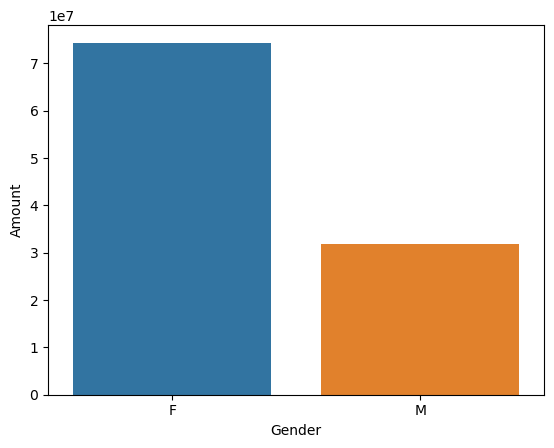

In [32]:
sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender', y='Amount', data = sales_gen)

From the above graph we can see that most of the buyers are female and even the purchasing power of females are greater than male.

# AGE

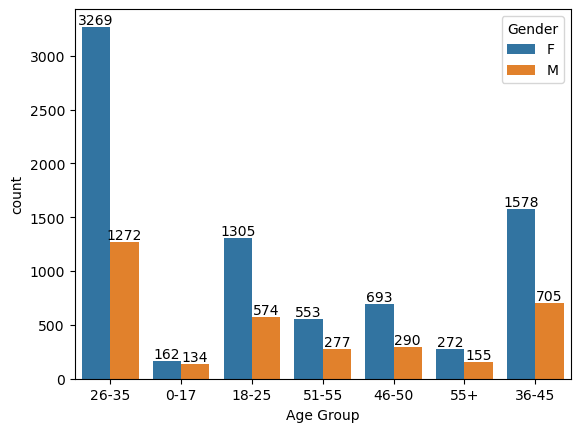

In [35]:
ax = sns.countplot(x='Age Group', data=df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

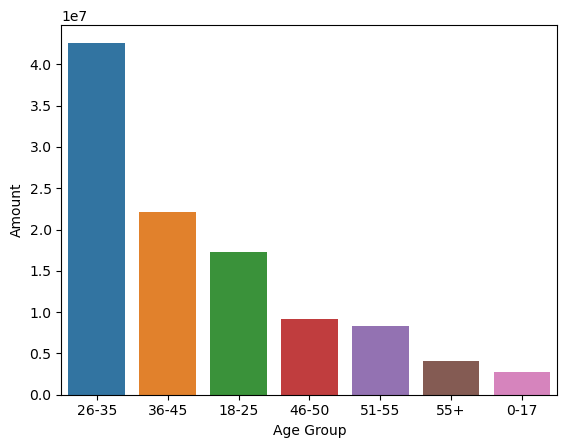

In [41]:
#Total amount vs age group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From the above graph we can see that most of the buyers are of age group between 26-35 yrs female.

# STATE

In [42]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

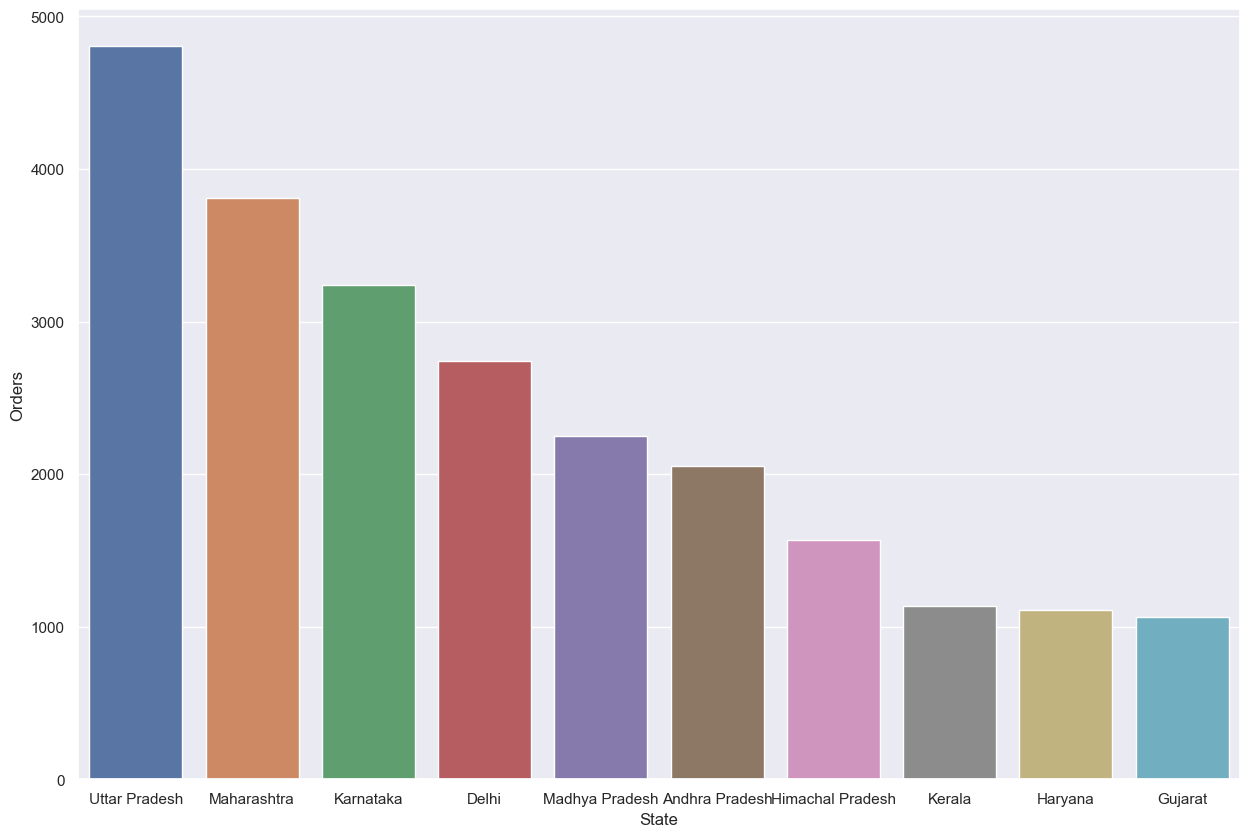

In [51]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x= 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

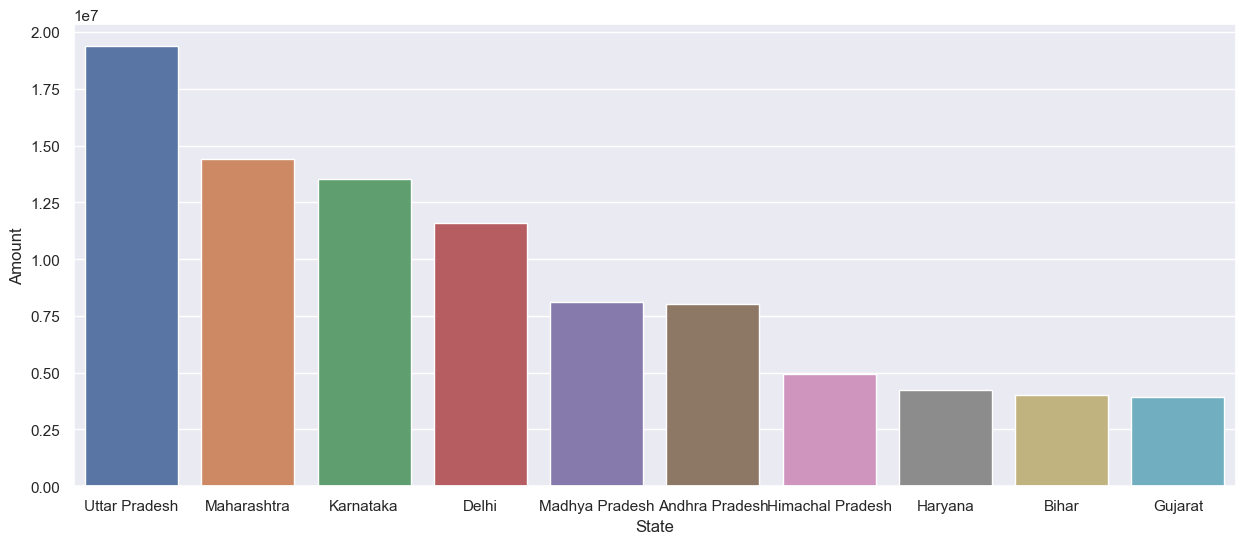

In [66]:
# Total amount of sales from top 10 states
sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x = 'State', y= 'Amount', data= sales_state)

From the above graph we can see that most of the total oders and total sale amount are from uttar pradesh, maharashtra and karnataka.

# Marital Status

In [53]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

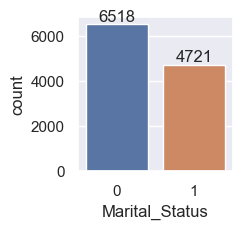

In [62]:
ax = sns.countplot(x= 'Marital_Status', data = df)
sns.set(rc={'figure.figsize':(4,2)})
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

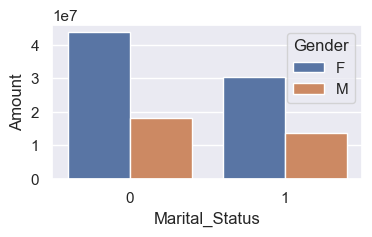

In [63]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x='Marital_Status', y='Amount', hue = 'Gender', data = sales_state)

From the above graph we can see that most of the buyers are married women and they have hight purchasing power.

# OCCUPATION

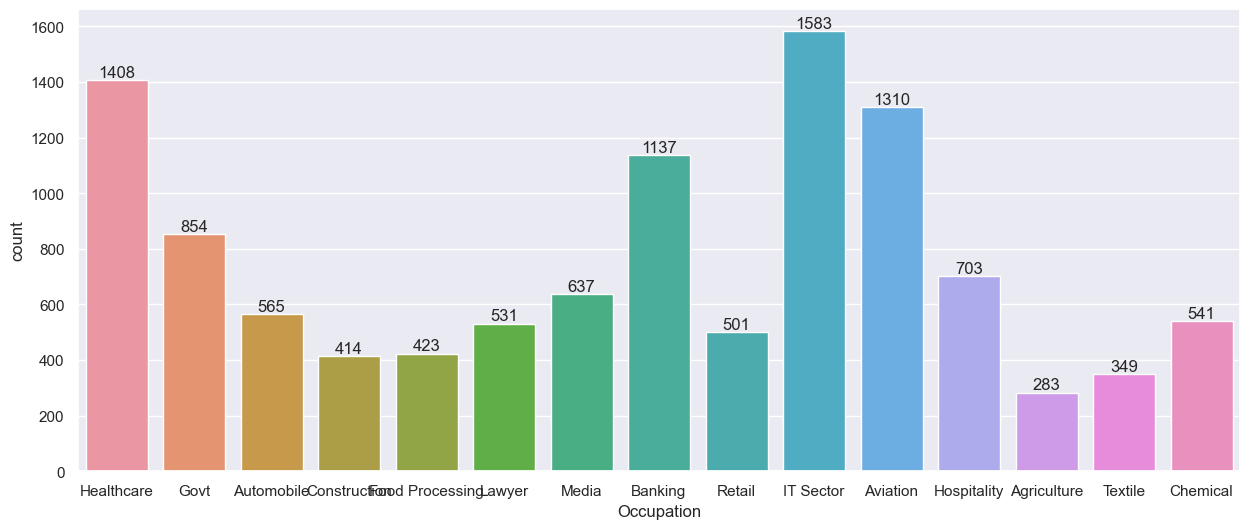

In [67]:
ax = sns.countplot(x= 'Occupation', data = df)
sns.set(rc={'figure.figsize':(4,2)})
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

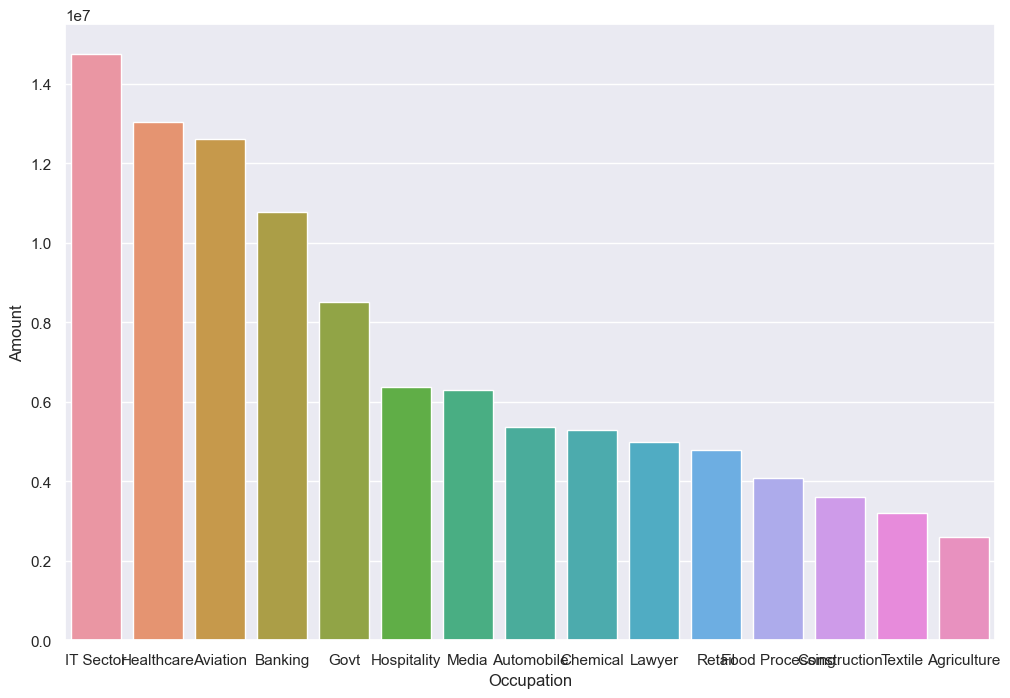

In [71]:
sales_state = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Occupation', y='Amount', data = sales_state)

From the above graph we can see that most of the buyers are working in IT, Healthcare and avation sector.

# Product category

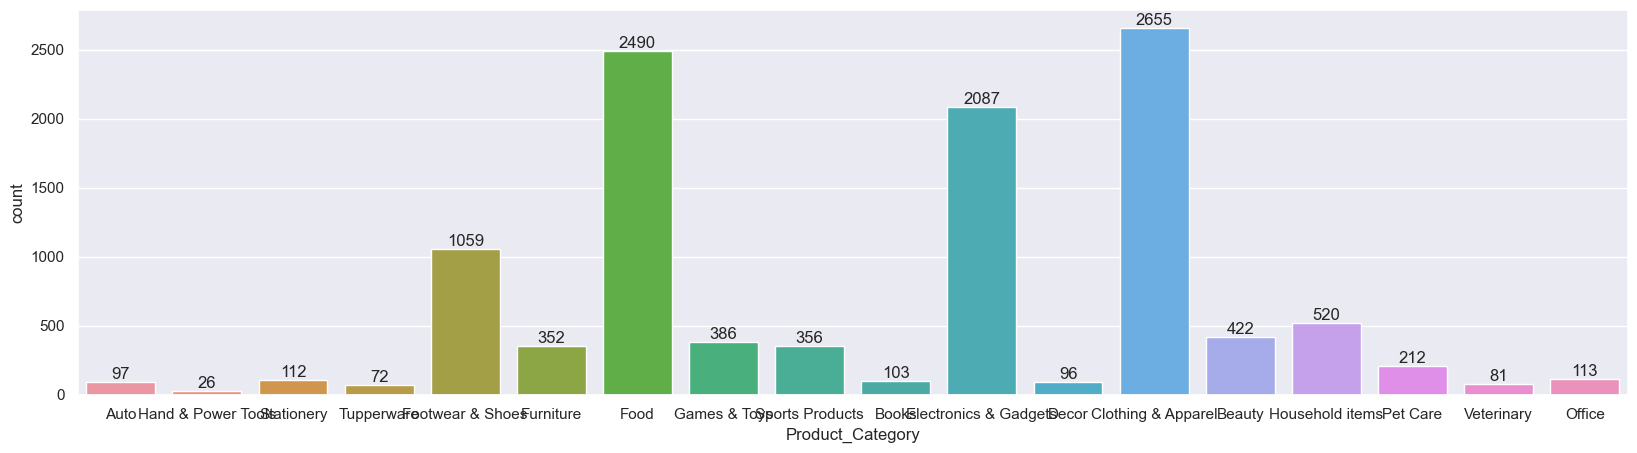

In [75]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x= 'Product_Category', data = df)
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

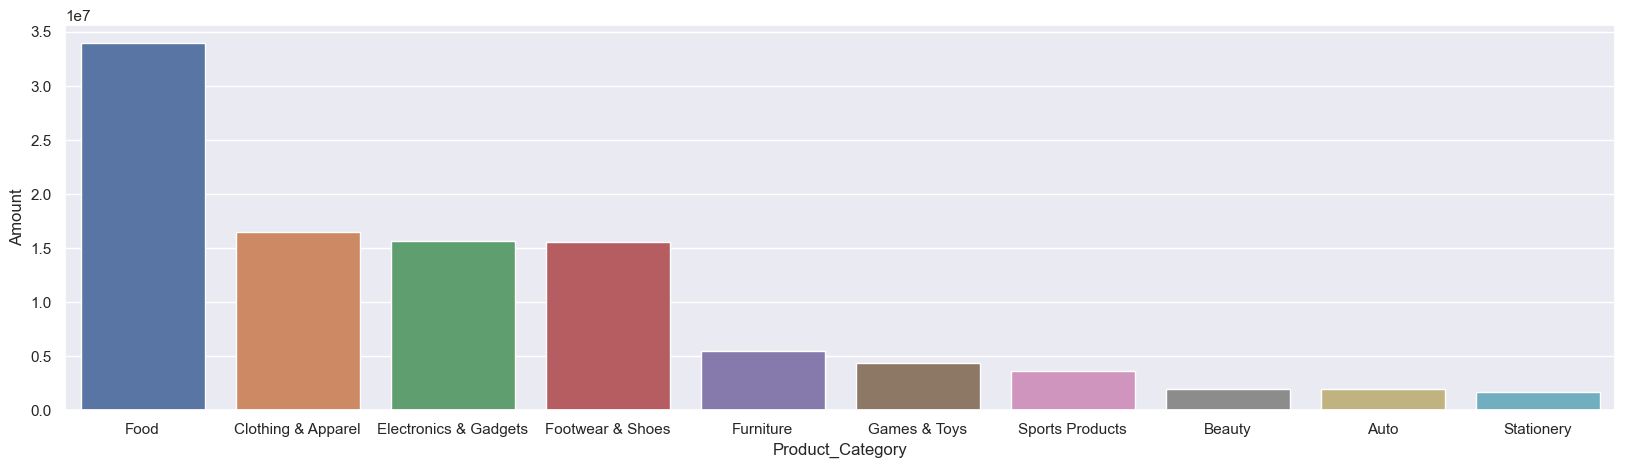

In [77]:
sales_state = df.groupby(['Product_Category'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', data = sales_state)

From above graph we can see that most of the sold products are from food clothing and electronics.

<Axes: xlabel='Product_ID', ylabel='Orders'>

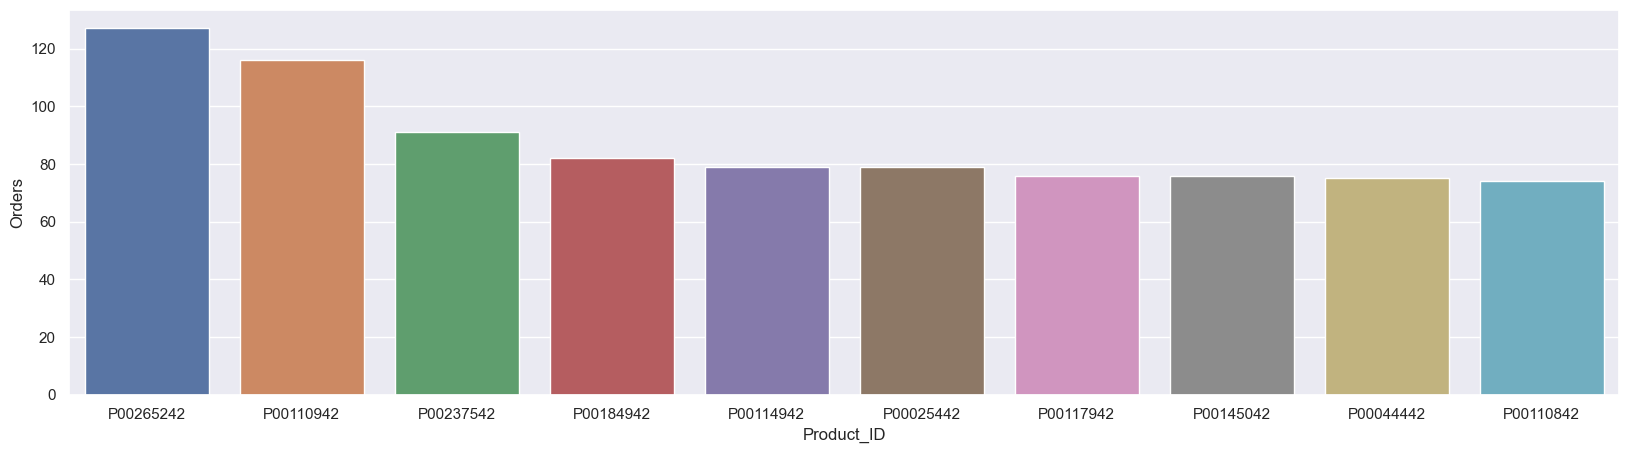

In [79]:
sales_state = df.groupby(['Product_ID'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID', y='Orders', data = sales_state)

# CONCLUSION

Married womens age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation sector are more likely to buy productsfrom food, clothing and electronics category.